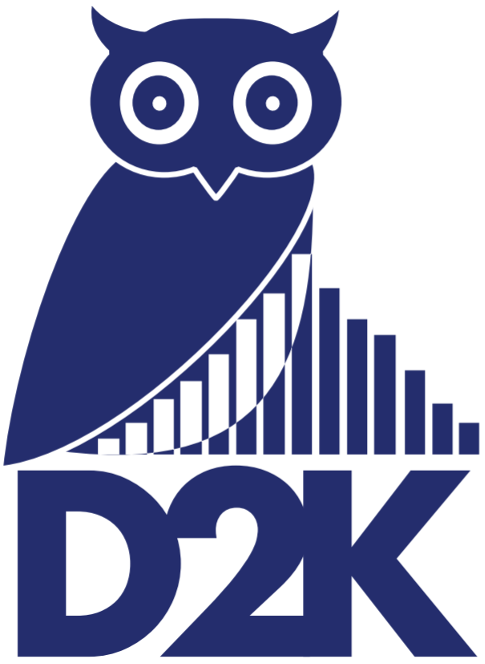 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Homework 5 ###

In [1]:
### standard imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('fivethirtyeight')
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns

import statsmodels.api as sm
from statsmodels.sandbox.predict_functional import predict_functional
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")

## Part I: Bayesian Inference

You work as an actuary in an automobile insurance compny. The following table shows one year of claims data: out of total of 9461 policy holders, 7840 made no claims during this year, 1317 made a single claim, 239 made two claims etc. Your job is of course to estimate how many expected claims each policy holder will make in the next year.


| Number of claims x | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 |Total
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Count of policy holders | 7840 | 1317 | 239 | 42 | 14 | 4 | 4 | 1 | 9461 |

**Question 1.1**: Let's assume for each policy holder $k$, the number of claims to be made in a single year $X_k$ follows a Poisson distribution with parameter $\theta_k$. From the company's point of view, a good policy holder should have a small value of $\theta$ (why?), though in any one year the actual number of claims $x_k$ will vary randomly according to the probability mass function: 
$$\mathbb{P}(X_k = x) = \frac{ \theta^x e^{-\theta} } {x!}$$
Suppose we want to put a prior distribution $\pi(\theta)$ on the unknown parameter $\theta$, without specifying what this prior distribution $\pi(\theta)$ is, use Bayes formula to derive the posterior distribution $\pi(\theta | x)$ including the normalizing constant, assuming only one single data point $x$: remember for each policy holder you only have their number of claims in one year, i.e. a single data point. Do NOT simplify any terms for now.

**Solution**:

$$ \pi(\theta | x) = \frac{ \frac{\theta^x e^{-\theta} }{x!} \pi(\theta)} {\int \frac{\theta^x e^{-\theta} }{x!} \pi(\theta) d \theta} $$

**Question 1.2**: Assuming you have correctly derived the posterior distribution $\pi(\theta | x)$, what would be a good estimate of expected number of claims a policy holder will make next year, given that he/she has made $x$ claims this year? Write down the expression of your estimate, and do NOT simplify any terms.

**Solution**: 

The best estimate should be the posterior mean:

$$ \mathbb{E} [\theta | x]  = \int \theta \frac{  \frac{\theta^x e^{-\theta} }{x!} \pi(\theta)} {\int \frac{\theta^x e^{-\theta} }{x!} \pi(\theta) d \theta} d \theta = \frac{ \int \theta \frac{\theta^x e^{-\theta} }{x!} \pi(\theta) d\theta} {\int \frac{\theta^x e^{-\theta} }{x!} \pi(\theta) d \theta} $$

**Question 1.3**: Remember the normalizing constant in your posterior is called the marginal likelihood:
$$f(x) = \int \frac{\theta^x e^{-\theta} }{x!} \pi(\theta) d \theta$$
Manipulate the expression you got in **1.2** in terms of marginal likelihood, that is, your simplified expression should have no prior distribution $\pi(\theta)$ or even $\theta$!

**Hint:** $(x+1)! = x!  (x+1)$

**Solution**: 

$$ \mathbb{E} [\theta | x]  = \frac{ \int \theta \frac{\theta^x e^{-\theta} }{x!} \pi(\theta) d\theta} {\int \frac{\theta^x e^{-\theta} }{x!} \pi(\theta) d \theta}  = \frac{(x+1) \int \frac{\theta^{x+1} e^{-\theta} }{(x+1)!} \pi(\theta) d\theta} {\int \frac{\theta^x e^{-\theta} }{x!} \pi(\theta) d \theta} = \frac{(x+1) f(x+1)}{f(x)}$$

**Question 1.4**: Based on the data you have, what is a good estimate of $f(x)$? Notice this is a discrete distribution even though we call it $f(x)$, because $x$ can only take integer values. In other words, estimate $\mathbb{P}(X = x)$ from the table in the problem. 

**Hint:** this is really simpler than you think, remember the empirical distribution of your data?

**Solution**: The empirical distribution is just proportion, i.e.:

$\mathbb{P}(X = 0) = 7840/9461$ etc.

In [2]:
total = 9461
P = np.array([7840,1317,239,42,14,4,4,1]) / total
P

array([8.28665046e-01, 1.39203044e-01, 2.52616003e-02, 4.43927703e-03,
       1.47975901e-03, 4.22788289e-04, 4.22788289e-04, 1.05697072e-04])

**Question 1.5**: Estimate the expected number of claims next year for policy holders who made 0 to 6 claims this year, round to 3 decimal places.

**Solution**: 

In [3]:
np.round( np.arange(1, 8) * P[1:] / P[:-1], 3)

array([0.168, 0.363, 0.527, 1.333, 1.429, 6.   , 1.75 ])

**You have just completed a Bayesian inference problem, without specifying any prior distribution!** Remember the posterior distribution is not available for any single policy holder without specifying a prior distribution. However, when you have data from a large study, it's as if large data sets of parallel situations carry within them their own Bayesian information. This technique came as a surprise to the statistical world in the begining, known as "empirical Bayes" where the prior information is estimated empirically from the data. In the age of big data, there has been a growing popularity of empirical Bayes methods. 

**Grading Notes: 10 pts total, 2 pts for each part, no partial credit.**

## Part II: Stochastic Processes

**Question 2.1**: Let $X_0, X_1, \dots$ be a Markov chain with states $\{ 0, 1, 2 \}$ and transition matrix

$$ P = \begin{bmatrix}
0.1 & 0.2 & 0.7 \\
0.9 & 0.1 & 0.0 \\
0.1 & 0.8 & 0.1
\end{bmatrix}$$

Assume that the initial distribution is $\pi_0 = (0.3, 0.4, 0.3)$.  Find $\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 2)$ and $\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 1)$.

**Grading Notes: 10 pts total.**

**Solution**.

We have:

$$
\begin{align}
\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 2) &= \mathbb{P}(X_0 = 0) \mathbb{P}(X_1 = 1 | X_0 = 0) \mathbb{P}(X_2 = 2 | X_1 = 1) \\
&= \pi_0(1) P_{12} P_{23} \\
& = 0.3 \cdot 0.2 \cdot 0.0 \\
& = 0
\end{align}
$$
**5 pts**

which can also be seen since there is no probability for a transition from state 1 to state 2 (the corresponding value in the $P$ matrix is zero).

We also have:

$$
\begin{align}
\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 2) &= \mathbb{P}(X_0 = 0) \mathbb{P}(X_1 = 1 | X_0 = 0) \mathbb{P}(X_2 = 1 | X_1 = 1) \\
&= \pi_0(1) P_{12} P_{22} \\
& = 0.3 \cdot 0.2 \cdot 0.1 \\
& = 0.006
\end{align}
$$
**5 pts**

**Question 2.2**: Let $Y_1, Y_2, \dots$ be a sequence of iid observations such that $\mathbb{P}(Y = 0) = 0.1$, $\mathbb{P}(Y = 1) = 0.3$,  $\mathbb{P}(Y = 2) = 0.2$, $\mathbb{P}(Y = 3) = 0.4$.  Let $X_0 = 0$ and let

$$ X_n = \max \{ Y_1, \dots, Y_n \} $$

Show that $X_0, X_1, \dots$ is a Markov chain and find the transition matrix.

**Grading Notes: 10 pts total.**

**Solution**.  By definition,

$$ X_{n + 1} = \max \{Y_1, \dots, Y_{n+1} \} = \max \{ X_n, Y_{n + 1} \} $$ **2 pts**

so $X_{n + 1}$ is defined based only on its predecessor $X_{n}$ (Markov property) and on a IID variable $Y_{n+1} \sim Y$.  Thus:

$$
\begin{align}
\mathbb{P}(X_{n + 1} = j | X_n = i) &= \frac{\mathbb{P}(X_{n + 1} = j \cap X_n = i)}{\mathbb{P}(X_n = i)}\\
=& \frac{\mathbb{P}(\max \{Y_1, \dots, Y_{n+1} \} = j \cap \max \{Y_1, \dots, Y_{n} \} = i)}{\mathbb{P}(\max \{Y_1, \dots, Y_{n} \} = i)} \\
=& \frac{\mathbb{P}(\max \{i, Y_{n+1} \} = j \cap \max \{Y_1, \dots, Y_{n} \} = i)}{\mathbb{P}(\max \{Y_1, \dots, Y_{n} \} = i)} \\
=& \frac{\mathbb{P}(\max \{i, Y_{n+1} \} = j) \cdot \mathbb{P}( \max \{Y_1, \dots, Y_{n} \} = i)}{\mathbb{P}(\max \{Y_1, \dots, Y_{n} \} = i)} \\
=& \mathbb{P}(\max \{i, Y_{n+1} \} = j)
=\begin{cases}
0 &\text{if } j < i \\
\mathbb{P}(Y \leq j) &\text{if } j = i \\
\mathbb{P}(Y = j) &\text{if } j > i
\end{cases} \\
\end{align}$$

This, paired with a state space $\mathcal{X} = \{ 0, 1, 2, 3 \} $ and initial probabilities $\mu_0 = (1, 0, 0, 0)$, defines a Markov chain for the $X_i$'s.  

The explicit transition matrix is:

$$ P = \begin{bmatrix}
0.1 & 0.3 & 0.2 & 0.4 \\
0   & 0.4 & 0.2 & 0.4 \\
0   & 0   & 0.6 & 0.4 \\
0   & 0   & 0   & 1
\end{bmatrix}$$

**Grading Notes: 2 pts for getting each row of transition matrix correctly.**

**Question 2.3**: Su wants to start a Boba tea shop near Rice. The plan is to have the shop open from 9am to 5pm everyday, and she needs to study her potential customer base to determine how large her shop should be. Suppose people start to arrive following a Poisson process with intensity $\lambda=1/2$ / min. Assume that a person stays in the shop for some random time (in min) that follows exponential distribution with $\lambda=1/15$, and is independent of other people. Let $Y(t)$ be the number of people in the shop at time t. It turns out that $Y(t)$ is a Poisson process with inhomogeneous rate. Can you simulate $Y(t)$? Based on your simulation, what would be the expected maximum number of people in the shop?

**Hint**: use empirical probability to calculate the expected maximum number!

**Simulation Solution**:

**Grading notes: 10 pts total, they can do it in different ways, full credit as long as results (mean around 15) is correct. 5 pts if result is off, no need to check code.**

In [4]:
def simulate_Y(poi_rate, exp_rate, T_max):
    ''' return the number of people at any time t between 9am-5pm
    time increments in minute
    poi_rate: intensity rate for poisson process
    exp_rate: rate parameter for exponential
    T_max: total length of time in minute
    return Y array length of T_max
    '''
    Y = [] # return value
    t = 0 # starting time
    arrive = [] # array for arriving time
    leave = [] # array for leaving time
    
    while t < T_max:
        # time until next arrival follows exponential
        t = t + np.random.exponential(scale=1/poi_rate, size=1)
        arrive = np.append(arrive, t)
        
    # time of stay also follows exponential
    leave = arrive + np.random.exponential(scale=1/exp_rate, size=len(arrive))
    
    for t in np.arange(1, T_max+1):
        # num of arrived - num of left
        # can also include "=": so sum(arrive<=t) - sum(leave<=t)? should be similar result
        num_people = sum(arrive<t) - sum(leave<t)
        Y = np.append(Y, num_people)
    
    return(Y)

In [5]:
# try out the function
poi_rate=1/2
exp_rate=1/15
T_max=8*60

simulate_Y(poi_rate=1/2,exp_rate=1/15, T_max=8*60)

array([ 0.,  1.,  1.,  1.,  1.,  3.,  4.,  4.,  3.,  3.,  3.,  3.,  2.,
        2.,  1.,  1.,  1.,  3.,  4.,  4.,  4.,  4.,  5.,  5.,  6.,  6.,
        6.,  5.,  7.,  6.,  7.,  5.,  5.,  6.,  8.,  8.,  8., 10., 10.,
       10., 11., 10., 10., 10., 10., 10.,  9.,  8., 10., 10., 11., 11.,
       10., 10., 10., 11., 11., 10., 10.,  9.,  8.,  8.,  7.,  8.,  8.,
        9.,  8.,  9., 10.,  9.,  9., 11., 12., 12., 13., 12., 13., 12.,
       10., 10.,  9.,  9.,  9.,  9., 10., 10., 11.,  9.,  9., 10.,  8.,
        9.,  9.,  9.,  9.,  9.,  8.,  8.,  8.,  9.,  9., 10., 10.,  9.,
        9.,  9.,  9.,  9.,  9., 10.,  9.,  9.,  8.,  6.,  7.,  8.,  6.,
        6.,  7.,  8.,  8.,  7.,  6.,  4.,  3.,  3.,  4.,  5.,  5.,  5.,
        5.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  6.,  7.,  7.,  7.,  6.,
        6.,  7.,  7.,  8.,  7.,  8.,  9., 10.,  8.,  8.,  7.,  9.,  8.,
        8.,  7.,  7.,  9.,  9.,  9.,  8.,  7.,  9.,  9.,  9., 10., 10.,
        9., 11., 10., 11., 11., 12., 13., 12., 11., 11., 11., 10

In [6]:
# it is a bit slow so rep >= 100 is fine
rep = 100
Y_df = pd.DataFrame({'Time in Min': np.arange(1, T_max+1)})

for i in np.arange(rep):
    Y_df['Simumation'+ str(i)] = simulate_Y(poi_rate,exp_rate, T_max)

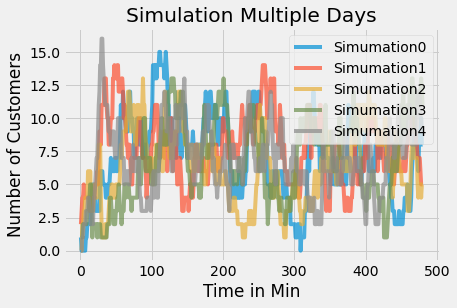

In [16]:
# plot a few simulated path
Y_df.iloc[:, 0:6].plot(x='Time in Min', alpha=0.7)
plt.ylabel('Number of Customers')
plt.title('Simulation Multiple Days');

Expected max number of customers:  15.18
80% CI of max number of customers:  [13.0, 18.0]


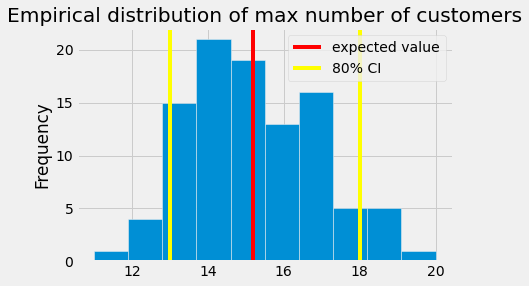

In [27]:
# the empirical distribution
# take max number from each day's simulation
Y_max_ct = Y_df.drop(columns='Time in Min').max()
# expected value of max number of customers
Y_exp_max_ct = np.mean(Y_max_ct)
# 80% CI lower and upper bounds
Y_max_ct_cil = np.percentile(Y_max_ct, 10)
Y_max_ct_ciu = np.percentile(Y_max_ct, 90)

# plot histogram
Y_max_ct.plot(kind='hist', label='')
# plot mean
plt.axvline(x=Y_exp_max_ct, color='red', label='expected value')
# plot 95% CI
plt.axvline(x=Y_max_ct_cil, color='yellow', label='80% CI')
plt.axvline(x=Y_max_ct_ciu, color='yellow')
plt.title('Empirical distribution of max number of customers')
plt.legend();
print('Expected max number of customers: ', Y_exp_max_ct)
print('80% CI of max number of customers: ', [Y_max_ct_cil, Y_max_ct_ciu])

**Question 2.4**:  Let $X(t)$ be a Poisson process with intensity $\lambda$.  Find the conditional distribution of $X(t)$ given that $X(t + s) = n$.

**Grading notes: 10 pts total: 5 pts for setting up the conditional probability statement correctly, 5 pts for plugging in Poisson PMF and derivation.**

**Solution**.  The random variables $X(t) - X(0) = X(t)$ and $X(s) = X(t + s) - X(t)$ are independent, as they are both count increments, with $X(t) \sim \text{Poisson}(\lambda t)$, $X(s) \sim \text{Poisson}(\lambda s)$ and $X(t + s) \sim \text{Poisson}(\lambda(t+s))$. Then:

$$
\begin{align}
\mathbb{P}( X(t) = x | X(t + s) = n ) &= \mathbb{P} (X(t) = x | X(t) + X(s) = n) \\
&= \frac{\mathbb{P}(X(t) = x, X(t) + X(s) = n )}{\mathbb{P}(X(t+s) = n)} \\
&= \frac{\mathbb{P}(X(t) = x, X(s) = n - x)}{ \mathbb{P}(X(t+s) =  n )} \\
&= \frac{\mathbb{P} (X(t) = x) \cdot \mathbb{P}(X(s) = n - x) }{ \mathbb{P}(X(t+s) =  n) } \\
&= \frac{ \frac{e^{-\lambda t} (\lambda t)^x }{x!} \frac{e^{-\lambda s}(\lambda s)^{n-x}}{(n-x)!}}{\frac{e^{-\lambda (t+s)} (\lambda (t+s))^n}{n!}}\\
&= \frac{n!}{x!(n-x)!} \frac{t^x s^{n-x}}{(t+s)^n} \\
&= \binom{n}{x} \left( \frac{t}{t + s} \right)^x \left( \frac{s}{t + s}\right)^{n - x} \\
\end{align}
$$

**grading notes: full credit as long as they derive the expression above, no need to simplify and recogonize the Binonmial distribution.**

This is the Binomial PMF if we call $\frac{t}{t+s}=p$ as the success probability and $\frac{s}{t+s}=1-p$ as the failure probability. Therefore, we have:

$$ X(t) | X(t + s) = n \sim \text{Binomial}\left(n, \frac{t}{t + s} \right)$$

## Part III: NHANES Case Study

In this part, we will be working with the [NHANES](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2015) data again. We will perform the same processing and cleaning of the data as before:

In [11]:
nhanes = pd.read_csv("nhanes_2015_2016.csv")
# fix column names to be informative
new_col_names = {'SEQN':'ID', 'ALQ130':'avg_drinks_per_day', 'SMQ020': 'smoker', 
                 'RIAGENDR':'gender', 'RIDAGEYR':'age', 'RIDRETH1':'race', 
                 'DMDCITZN':'citizen', 'DMDEDUC2':'educ_level', 
                 'DMDMARTL':'mari_stat', 'INDFMPIR':'fam_pov_income_ratio', 
                 'BPXSY1':'systolic_bp', 'BPXDI1':'diastolic_bp', 
                 'BMXWT':'weight', 'BMXHT':'height', 'BMXBMI':'bmi', 
                 'BMXLEG':'upper_leg_len', 'BMXARML':'upper_arm_len', 
                 'BMXARMC': 'arm_cir', 'BMXWAIST':'waist_cir'}
nhanes.rename(columns=new_col_names, inplace=True)
# replace some code as missing values
nhanes['avg_drinks_per_day'] =  nhanes['avg_drinks_per_day'].replace({777:np.NaN, 999:np.NaN})
nhanes['smoker'] = nhanes['smoker'].replace({7:np.NaN, 9:np.NaN})
nhanes['educ_level'] = nhanes['educ_level'].replace({7:np.NaN, 9:np.NaN})
nhanes['mari_stat'] = nhanes['mari_stat'].replace({77:np.NaN})
nhanes['citizen'] = nhanes['citizen'].replace({7:np.NaN, 9:np.NaN})
# there are quite a few missing values but most model will exclude them
nhanes.head()

ID  ALQ101  ALQ110  avg_drinks_per_day  smoker  gender  age  race  \
0  83732     1.0     NaN                 1.0     1.0       1   62     3   
1  83733     1.0     NaN                 6.0     1.0       1   53     3   
2  83734     1.0     NaN                 NaN     1.0       1   78     3   
3  83735     2.0     1.0                 1.0     2.0       2   56     3   
4  83736     2.0     1.0                 1.0     2.0       2   42     4   

   citizen  educ_level  ...  BPXSY2  BPXDI2  weight  height   bmi  \
0      1.0         5.0  ...   124.0    64.0    94.8   184.5  27.8   
1      2.0         3.0  ...   140.0    88.0    90.4   171.4  30.8   
2      1.0         3.0  ...   132.0    44.0    83.4   170.1  28.8   
3      1.0         5.0  ...   134.0    68.0   109.8   160.9  42.4   
4      1.0         4.0  ...   114.0    54.0    55.2   164.9  20.3   

   upper_leg_len  upper_arm_len  arm_cir  waist_cir  HIQ210  
0           43.3           43.6     35.9      101.1     2.0  
1           38.0           40.0     33.2      107.9     NaN  
2           35.6           37.0     31.0      116.5     2.0  
3           38.5           37.7     38.3      110.1     2.0  
4           37.4           36.0     27.2       80.4     2.0  

[5 rows x 28 columns]

**Question 3.1:**  
Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [12]:
# enter your code here
model1 = sm.OLS.from_formula('bmi ~ age', data=nhanes)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     20.17
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           7.21e-06
Time:                        22:12:44   Log-Likelihood:                -19118.
No. Observations:                5662   AIC:                         3.824e+04
Df Residuals:                    5660   BIC:                         3.825e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.2788      0.263    107.496      0.000      27.763      28.795
age            0.0230      0.005      4.492      0.000       0.013       0.033
==============================================================================
Omnibus:                     1083.068   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2193.456
Skew:                           1.140   Prob(JB):                         0.00
Kurtosis:                       5.025   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3.1.1:**  According to your fitted model, do older people tend to have higher or lower BMI than younger people?

**Solution:**  
Older people on average have higher BMI, because the slope is positive and significant. 

**3.1.2:**   Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

**Solution:**  
Yes, we reject the null hypothesis that the slope is 0, and conclude that BMI and age are positively correlated. 

**3.1.3:** By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

In [172]:
0.0230*(40-20)

0.45999999999999996

**3.1.4:** What fraction of the variation of BMI in this population is explained by age?

**Solution:**  
$R^2 = 0.004$ indicating only $0.4\%$ of the variation of BMI is explained by age.

**Grading notes: 10 pts total. 2 pts for running the model correctly, and 2 pts for each part in 3.1.1 - 3.1.4, no partial credit.**

**Question 2.2:**

Add gender and race as additional control variables to your linear model relating BMI to age. To make results more readable, you can choose to recode the gender and race groups based on:

- Gender:
    - 1: Male
    - 2: Female
- Race: 
    - 1: Mexican American
    - 2: Other Hispanic
    - 3: Non-Hispanic White
    - 4: Non-Hispanic Black
    - 5: Other Race Including Multi-Racial
    
Otherwise, you need to use `C(Race)` and `C(Gender)` to be included as categorical variables correctly (since they are coded as numbers).

In [13]:
# enter your code here
model2 = sm.OLS.from_formula('bmi ~ age + C(race) + C(gender)', data=nhanes)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     55.09
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           2.18e-66
Time:                        22:13:26   Log-Likelihood:                -18968.
No. Observations:                5662   AIC:                         3.795e+04
Df Residuals:                    5655   BIC:                         3.800e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         29.4478      0.335     87.943      0.000      28.791      30.104
C(race)[T.2]      -1.1240      0.334     -3.364      0.001      -1.779      -0.469
C(race)[T.3]      -1.8350      0.273     -6.715      0.000      -2.371      -1.299
C(race)[T.4]      -0.5707      0.295     -1.934      0.053      -1.149       0.008
C(race)[T.5]      -4.7212      0.318    -14.849      0.000      -5.345      -4.098
C(gender)[T.2]     1.0696      0.184      5.819      0.000       0.709       1.430
age                0.0205      0.005      4.054      0.000       0.011       0.030
==============================================================================
Omnibus:                     1055.828   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2167.403
Skew:                           1.106   Prob(JB):                         0.00
Kurtosis:                       5.071   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3.2.1:** How did the mean relationship between BMI and age change when you added additional covariates to the model?

**Solution:**  
The slope for age decreased slightly from 0.0230 to 0.0205, but is still significant. 

**3.2.2:** How did the standard error for the regression parameter for age change when you added additional covariates to the model?

**Solution:**  
The standard error for slope of age stayed the same as 0.005. 

**3.2.3:** How much additional variation in BMI is explained by age, gender, and race that is not explained by age alone?

**Solution:**  
$R^2$ increased from $0.004$ to $0.055$, additional $5.1\%$ of variation in BMI is explained by the model.

**3.2.4:** What reference level did the software select for the race variable?

**Solution:**  
This depends on whether they recoded the race or not. By default, it will choose the level 1 as reference if it is coded as numbers. In this case, it is the Mexican American.

**3.2.5:**  What is the expected difference between the BMI of a 40 year-old non-Hispanic white man and a 30 year-old Hispanic man?

**Solution:**
Difference should be the slope of age times 10 plus the differnce between slope for white and slope for hispanic.     

In [2]:
0.0205*(40 - 30)+((-1.8350) - (-1.1240))

-0.5059999999999998

**3.2.6:** What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic white man?

**Solution:** 
Difference should be the slope for female plus the slope for white. 

In [4]:
1.0696 + (0 - (-1.8350))

2.9046000000000003

**Grading notes: 10 pts total. 2 pts for running the model correctly, and 1 pt for each part in 3.2.1 - 3.2.4, 2 pts for each part in 3.2.5 - 3.2.6, no partial credit.**

**Question 3.3:** Randomly sample 25% of the NHANES data, then fit the same model you used in question 2.2 to this data set.

You can use [`df.sample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) and set `frac=0.25` and `random_state=2021`.

In [14]:
# enter your code here
nhanes_sample = nhanes.sample(frac=0.25, random_state=2021)
model3 = sm.OLS.from_formula('bmi ~ age + C(race) + C(gender)', data=nhanes_sample)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bmi   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     12.29
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           1.60e-13
Time:                        22:14:04   Log-Likelihood:                -4714.1
No. Observations:                1413   AIC:                             9442.
Df Residuals:                    1406   BIC:                             9479.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         28.7224      0.658     43.672      0.000      27.432      30.013
C(race)[T.2]      -0.5214      0.684     -0.762      0.446      -1.864       0.821
C(race)[T.3]      -1.4633      0.552     -2.651      0.008      -2.546      -0.381
C(race)[T.4]       0.4332      0.582      0.744      0.457      -0.708       1.575
C(race)[T.5]      -3.9148      0.631     -6.202      0.000      -5.153      -2.677
C(gender)[T.2]     0.5199      0.364      1.430      0.153      -0.193       1.233
age                0.0245      0.010      2.493      0.013       0.005       0.044
==============================================================================
Omnibus:                      328.882   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              851.906
Skew:                           1.223   Prob(JB):                    1.03e-185
Kurtosis:                       5.913   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**3.3.1:** How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

**Solution:** 
- all standard errors increased and CIs all got wider
- slope for black flipped sign but was boradline significant in the full model
- most slopes remained its sign and significance. 

**Grading notes: 10 pts total, 5 pts for running the model correctly on subset of data, 5 pts for correct comments (as long as they mention increased standard errors).**

**Question 3.4:**
Visualize the model you fit in question 2.2.

**3.4.1:** Generate a scatterplot of the residuals against the fitted values.

In [15]:
# enter your code here
pp = sns.scatterplot(result2.fittedvalues, result2.resid)
pp.set_xlabel('Fitted values')
_ = pp.set_ylabel('Residuals')

**3.4.2:** Generate a scatterplot of true values against the fitted values.

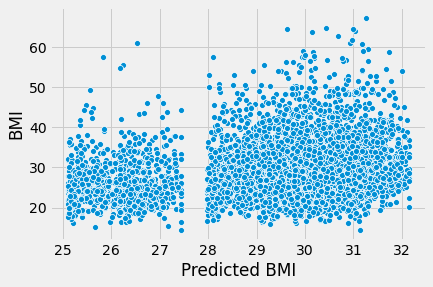

In [17]:
pp = sns.scatterplot(result2.fittedvalues, nhanes['bmi'])
pp.set_xlabel('Predicted BMI')
_ = pp.set_ylabel('BMI')

**Grading notes: 10 pts total. 5 pts for each plot, no partial credit.**

**Question 3.5:**

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men. Include a 95% confidence band on your graph.

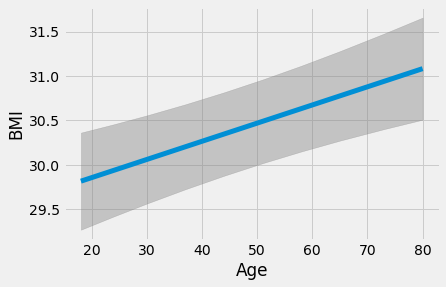

In [18]:
# enter your code here

values = {'gender':1, 'race':1}
pred, CI, X = predict_functional(result2, 'age', values=values)

ax = sns.lineplot(X, pred, lw=5)
ax.fill_between(X, CI[:, 0], CI[:, 1], color='grey', alpha=0.4)
ax.set_xlabel('Age')
_ = ax.set_ylabel('BMI')

**3.5.1:** According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  
**Hint:** What is the longest horizontal line starting at age 30 that remains within the confidence band?

**Solution:** 
From 30 to 80.

**3.5.2:** Create line and confidence band on the same plot, showing the relationship between age and BMI for white men and women.

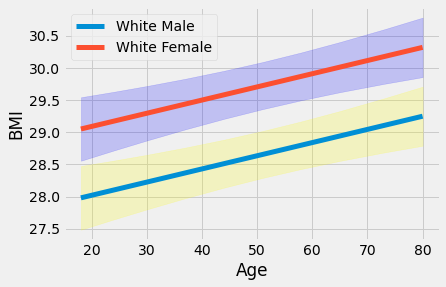

In [19]:
# enter your code here

values1 = {'gender':1, 'race':3}
pred1, CI1, X1 = predict_functional(result2, 'age', values=values1)
ax = sns.lineplot(X1, pred1, lw=5, label='White Male')
ax.fill_between(X1, CI1[:, 0], CI1[:, 1], color='yellow', alpha=0.2)

values2 = {'gender':2, 'race':3}
pred2, CI2, X2 = predict_functional(result2, 'age', values=values2)
ax = sns.lineplot(X2, pred2, lw=5, label='White Female')
ax.fill_between(X2, CI2[:, 0], CI2[:, 1], color='blue', alpha=0.2)

ax.set_xlabel('Age')
_ = ax.set_ylabel('BMI')

 **3.5.3:** At what ages do these intervals not overlap? What does the result imply?

**Solution:** 
For the entire age range they do not overlap. This means the differnce between average white male and white femal BMI is significant when controling for age. 

**Grading Note: 10 pts total. 4 pts for correct plot, 1 pt for 3.5.1, 4 pts for 3.5.2 plot, and 1 pt for 3.5.3, no partial credit.** 

You're done with HW 5!  Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file**, replacing LASTNAME with your last name,
* **Upload** your file to the course website.